# **Electricity-cost-prediction-dataset**:

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shalmamuji/electricity-cost-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 154k/154k [00:00<00:00, 38.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shalmamuji/electricity-cost-prediction-dataset/versions/1


# **Import Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np

# **First Upload Your data then Read Dataset**

In [5]:
df=pd.read_csv('/content/electricity_cost_dataset.csv')


In [6]:
df.head(10)

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0
5,3944,Commercial,6960.0,22,43,194,59,0,3800.0
6,3671,Residential,2803.0,24,66,149,18,139,3661.0
7,3419,Mixed-use,5601.0,17,61,140,21,38,2538.0
8,630,Residential,1000.0,20,82,92,56,41,1390.0
9,2185,Residential,2170.0,32,57,133,52,117,2599.0


In [7]:
df.columns



Index(['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count', 'electricity cost'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
site area,0
structure type,0
water consumption,0
recycling rate,0
utilisation rate,0
air qality index,0
issue reolution time,0
resident count,0
electricity cost,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [10]:
df.count()

,0
site area,10000
structure type,10000
water consumption,10000
recycling rate,10000
utilisation rate,10000
air qality index,10000
issue reolution time,10000
resident count,10000
electricity cost,10000


# **One hot Encoding**

Using Pandas Library

In [ ]:
encoded_data=pd.get_dummies(df,columns=['structure type'],drop_first=True).astype(int)

In [111]:
encoded_data.head(10)


,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519,69,52,188,1,72,1420,0,1,0
1,4272,2324,50,76,165,65,261,3298,0,1,0
2,3592,2701,20,94,198,39,117,3115,0,1,0
3,966,1000,13,60,74,3,35,1575,0,0,1
4,4926,5990,23,65,32,57,185,4301,0,0,1
5,3944,6960,22,43,194,59,0,3800,0,0,0
6,3671,2803,24,66,149,18,139,3661,0,0,1
7,3419,5601,17,61,140,21,38,2538,0,1,0
8,630,1000,20,82,92,56,41,1390,0,0,1
9,2185,2170,32,57,133,52,117,2599,0,0,1


In [13]:
encoded_data.columns

Index(['site area', 'water consumption', 'recycling rate', 'utilisation rate',
       'air qality index', 'issue reolution time', 'resident count',
       'electricity cost', 'structure type_Industrial',
       'structure type_Mixed-use', 'structure type_Residential'],
      dtype='object')

# **One Hot Encoding Using Sklearn**



In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
#Get all categorical Column From Your Data Sets
categorical_column=df.select_dtypes(include=['object']).columns.tolist()

encoder=OneHotEncoder(sparse_output=False)

onehot_encoded=encoder.fit_transform(df[categorical_column])


In [16]:
#convert into dataframe
one_hot_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(categorical_column))

In [112]:
one_hot_df.head(5)

,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [18]:
#make new dataframe df3 and concatenate new datafram
df3 = pd.concat([df, one_hot_df], axis=1)
df3.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0,0.0,0.0,1.0,0.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0,0.0,0.0,1.0,0.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0,0.0,0.0,1.0,0.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0,0.0,0.0,0.0,1.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0,0.0,0.0,0.0,1.0


In [19]:
#drop Column
df3.drop(columns=["structure type"],inplace=True)
df3.head()


,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,0.0,0.0,1.0,0.0
1,4272,2324.0,50,76,165,65,261,3298.0,0.0,0.0,1.0,0.0
2,3592,2701.0,20,94,198,39,117,3115.0,0.0,0.0,1.0,0.0
3,966,1000.0,13,60,74,3,35,1575.0,0.0,0.0,0.0,1.0
4,4926,5990.0,23,65,32,57,185,4301.0,0.0,0.0,0.0,1.0


In [20]:
X=df3.drop('electricity cost',axis=1)

In [21]:
Y=df3['electricity cost']

# **Visulization**

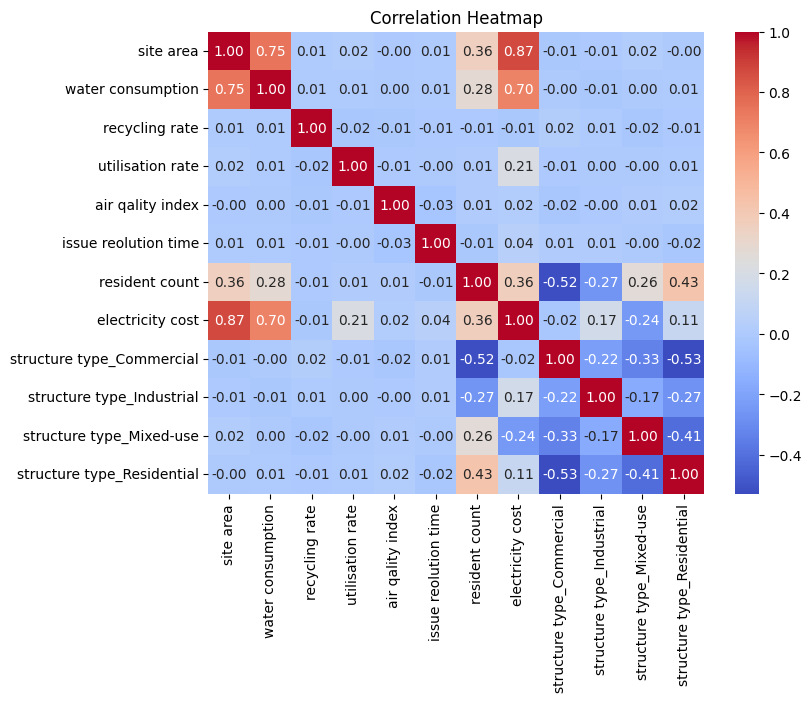

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df3.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


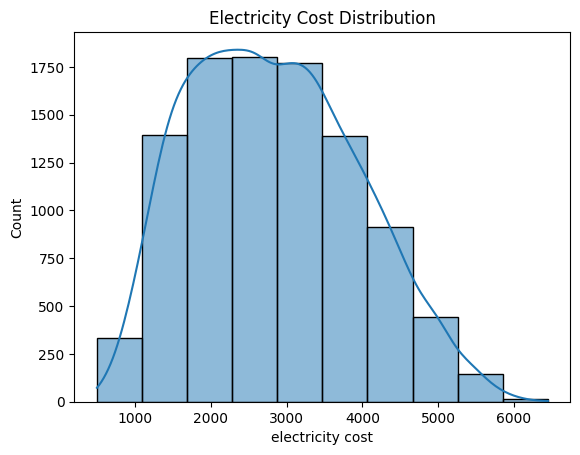

In [23]:
#for check Data Destribution  we plot histogram
sns.histplot(df["electricity cost"], kde=True, bins=10)
plt.title("Electricity Cost Distribution")
plt.show()


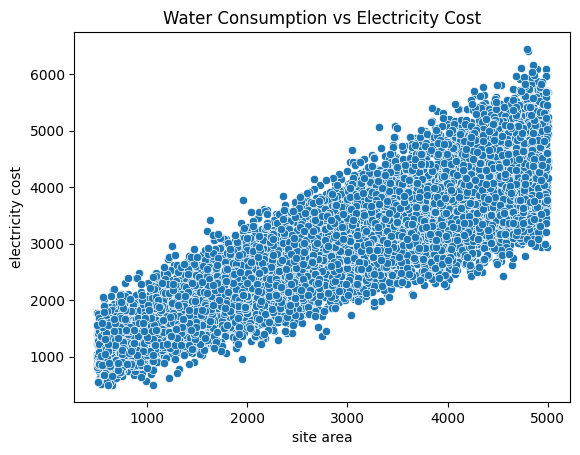

In [30]:

sns.scatterplot(x="site area", y="electricity cost", data=df)
plt.title("Water Consumption vs Electricity Cost")
plt.show()


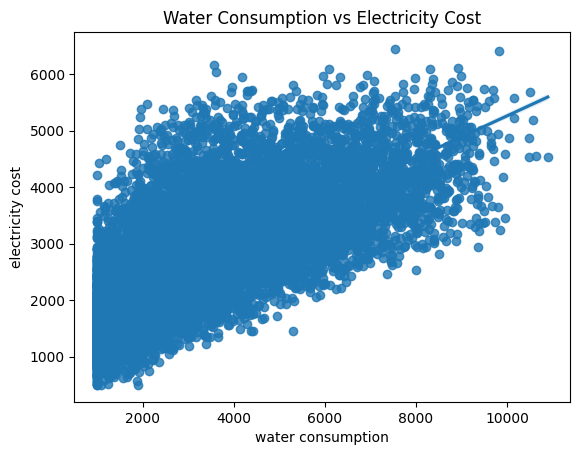

In [26]:
sns.regplot(x="water consumption", y="electricity cost", data=df)
plt.title("Water Consumption vs Electricity Cost")
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

In [81]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [82]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [85]:
y_pred=model.predict(x_test)

In [113]:
MSE=mean_squared_error(y_test,y_pred)
MSE

104272.093

In [114]:
sample = np.array([[1360	,2519.0	,69,	52,	188,	1,	72,		0.0,	0.0,	1.0,	0.0]])
pre=model.predict(sample)
pre

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3710.])

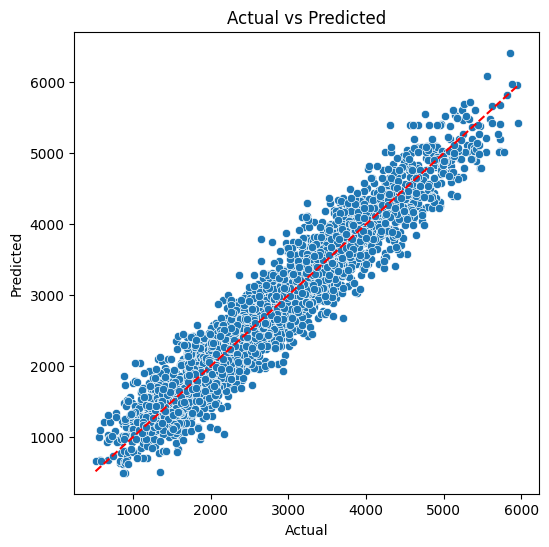

In [115]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)   # y_test = actual, y_pred = predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [55]:
sample = np.array([[3592, 2701.0, 20, 94, 198, 39, 117, 0.0, 0.0, 1.0, 0.0]])
pre=model.predict(sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3054.99826472])

# **Try After Scaling Feature**

In [91]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)



In [92]:
X_train=pd.DataFrame(X_scaled,columns=X_train.columns)
X_test=pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [93]:
X_test

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,-1.012440,-1.192084,-1.171332,0.210985,1.363172,1.391590,-0.788863,-0.660895,2.985802,-0.502231,-0.805846
1,-1.461546,-1.192084,-1.641075,1.587405,-0.532663,1.537092,-0.073029,-0.660895,-0.334918,-0.502231,1.240932
2,0.287034,0.487661,-1.641075,1.439932,-1.118649,-0.499939,1.340284,-0.660895,-0.334918,-0.502231,1.240932
3,-1.312616,-0.762449,-0.573477,1.194142,-1.394406,1.003584,-0.788863,1.513101,-0.334918,-0.502231,-0.805846
4,-1.316474,-1.192084,-0.915109,0.702564,-1.515051,1.197587,0.119695,-0.660895,-0.334918,-0.502231,1.240932
...,...,...,...,...,...,...,...,...,...,...,...
2995,1.512429,2.307264,-0.231846,0.014354,1.587225,-1.227449,2.900434,-0.660895,-0.334918,-0.502231,1.240932
2996,-0.777084,-1.192084,0.067082,-0.280593,-0.653307,-0.257435,0.073808,-0.660895,-0.334918,1.991115,-0.805846
2997,1.152064,2.169321,-0.018326,0.407617,-0.412019,0.227572,0.908948,-0.660895,-0.334918,1.991115,-0.805846
2998,0.944488,0.442638,1.305496,1.439932,1.139119,0.179072,1.872570,-0.660895,-0.334918,-0.502231,1.240932


In [94]:
model.fit(X_scaled,Y_train)

LinearRegression()

In [95]:
y_pre=model.predict(X_test_scaled)

In [96]:
MSE=mean_squared_error(y_test,y_pre)
MSE

97114.66963480854

In [116]:
RMSE=np.sqrt(MSE)
RMSE

np.float64(322.91189665294155)

In [98]:
sample = np.array([[1.512429,	2.307264,	-0.231846,	0.014354,	1.587225,	-1.227449,	2.900434,	-0.660895,	-0.334918,	-0.502231,	1.240932]])
pre=model.predict(sample)
pre

array([5086.03660876])